# Finite differencing method

In [52]:
# computing derivatives using the three finite differencing methods
from pylab import *

def f(x):
    return (exp(x)*sin(x))
def df(x):
    return (exp(x)*(cos(x)+sin(x)))

#forward differencing
def ff(x,h):
    return ((f(x+h)-f(x))/h)

#backward differencing
def fb(x,h):
    return ((f(x)-f(x-h))/h)

#central differencing
def fc(x,h):
    return ((f(x+h)-f(x-h))/(2*h))
    
ND=[]    #numerical value of differentiation
AD=[]    #analytical value of differentiation
xi=[]
x_min=0.0
x_max=2.0*pi
ht=([0.001,0.01,0.1])
for h in ht:
    n=int((x_max-x_min)/h)
    x=linspace(x_min,x_max,n)
    xi.append(x)
    a=[]
    b=[]
    for value in x:
        if(value<(x_max/3.0)):
            a.append(ff(value,h))
        if((value>=(x_max/3.0))and(value<(2.0*x_max/3.0))):
            a.append(fc(value,h))
        if(value>=(2.0*x_max/3.0)):
            a.append(fb(value,h))
            
        b.append(df(value))
    ND.append(a)
    AD.append(b)

Text(0, 0.5, "$f'(x)$")

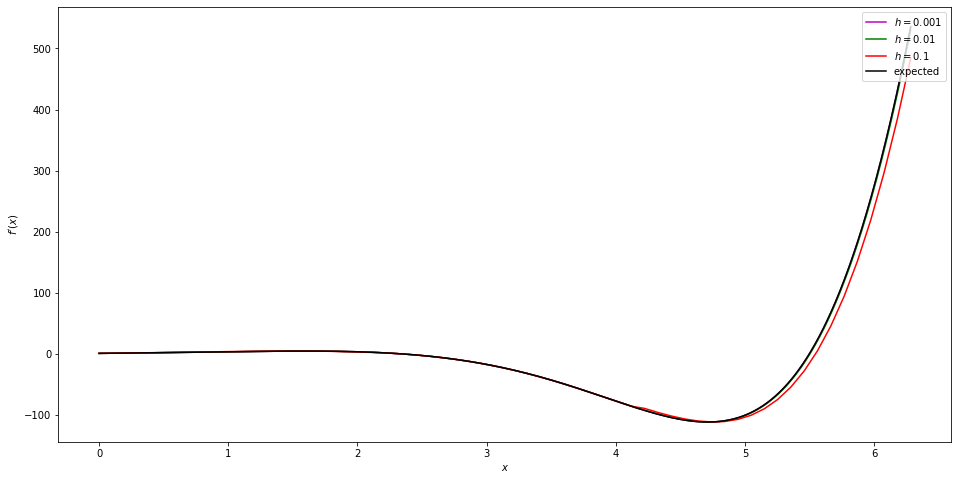

In [53]:
#plotting the numerically computed derivative
plt.figure(figsize=(16,8))

plot(xi[0],ND[0],'m-')
plot(xi[1],ND[1],'g-')
plot(xi[2],ND[2],'r-')
#the expected plot
plot(xi[0],exp(xi[0])*(cos(xi[0])+sin(xi[0])),'k-')
legend(['$h=0.001$','$h=0.01$','$h=0.1$','expected'],loc='upper right')
xlabel('$x$')
ylabel("$f'(x)$")

Text(0, 0.5, 'error')

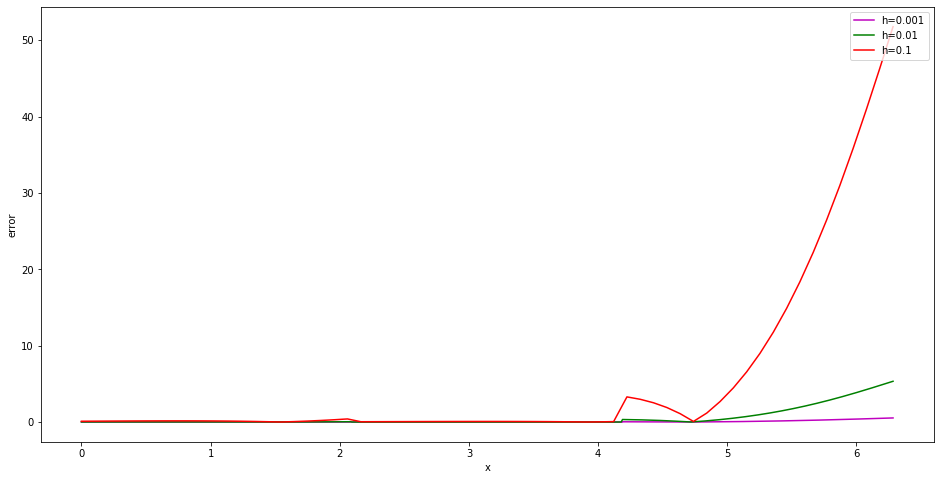

In [54]:
#plotting the errors for different values of h
plt.figure(figsize=(16,8))
err=[]
for i in range (3):
    e=[]
    for y in range (len(ND[i])):
        e.append(abs(ND[i][y]-AD[i][y]))
    err.append(e)
plot(xi[0],err[0],'m-')
plot(xi[1],err[1],'g-')
plot(xi[2],err[2],'r-')
legend(['h=0.001','h=0.01','h=0.1','expected'],loc='upper right')
xlabel('x')
ylabel("error")

Text(0, 0.5, "f'(x)")

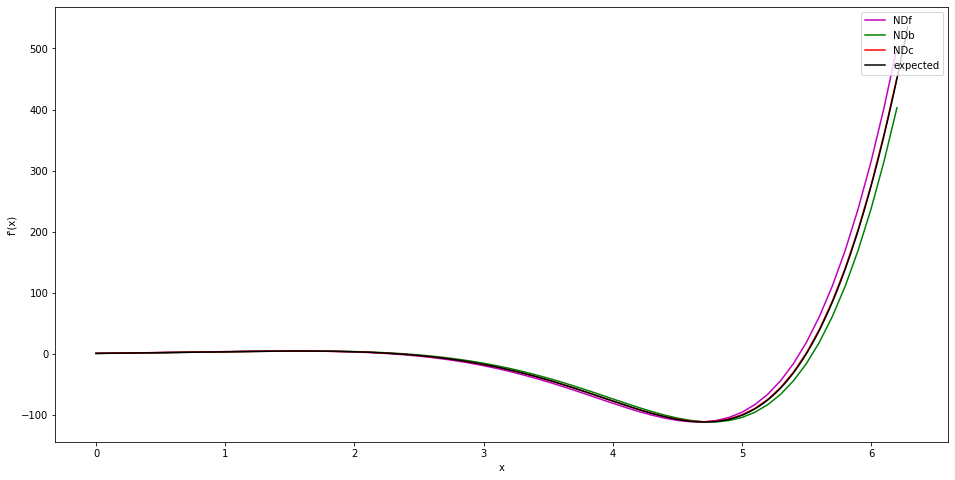

In [57]:
#using only one h vs single method over the whole range of x:
h=0.1
x=arange(x_min,x_max,h)
NDf=[]
NDb=[]
NDc=[]
for value in x:
    NDf.append(ff(value,h))
    NDb.append(fb(value,h))
    NDc.append(fc(value,h))
#plotting the numerically computed derivative
plt.figure(figsize=(16,8))

plot(x,NDf,'m-')
plot(x,NDb,'g-')
plot(x,NDc,'r-')
#the expected plot
plot(xi[0],exp(xi[0])*(cos(xi[0])+sin(xi[0])),'k-')
legend(['NDf','NDb','NDc','expected'],loc='upper right')
xlabel('x')
ylabel("f'(x)")

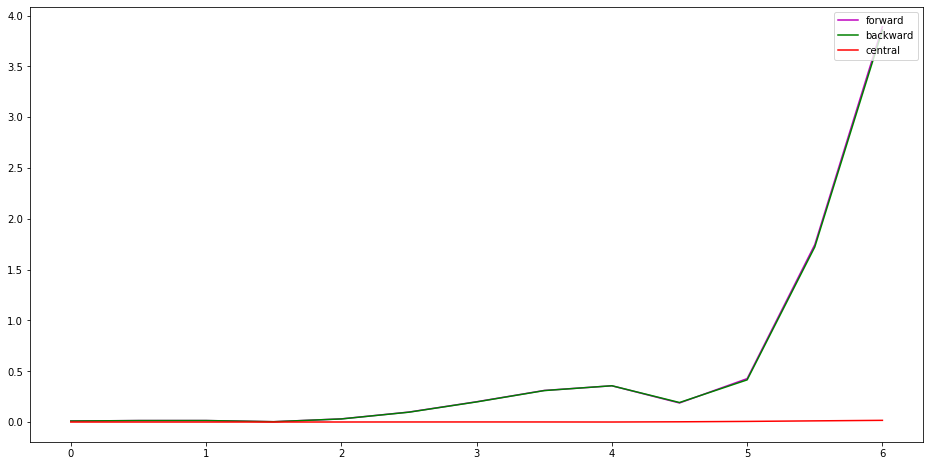

In [51]:
#plotting the errors for different values of h but with only one method used
plt.figure(figsize=(16,8))
errf=[]
errb=[]
errc=[]
for h in ht:
    NDf=[]
    NDb=[]
    NDc=[]
    AD=[]
    ef=[]
    eb=[]
    ec=[]
    for value in x:
        NDf.append(ff(value,h))
        NDb.append(fb(value,h))
        NDc.append(fc(value,h))
        AD.append(df(value))
    ef=abs(subtract(NDf,AD))
    eb=abs(subtract(NDb,AD))
    ec=abs(subtract(NDc,AD))
    errf.append(ef)
    errb.append(eb)
    errc.append(ec)

plot(x,errf[1],'m-')  #change to 0 for h=0.001, 1 for 0.01, 2 for 0.1
plot(x,errb[1],'g-')
plot(x,errc[1],'r-')
legend(['forward','backward','central'],loc='upper right')


Text(0, 0.5, "$f'(x)$")

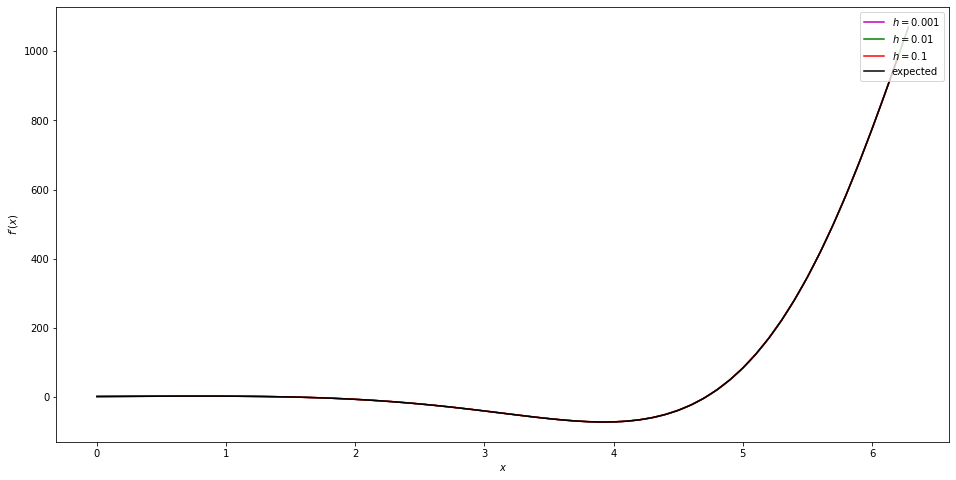

In [69]:
#the second derivative central differencing
def fdd(x):
    return (2.0*exp(x)*cos(x))
def fcc(x,h):
    return ((f(x+h)+f(x-h)-2.0*f(x))/(h*h))

plt.figure(figsize=(16,8))

ND=[]    #numerical value of differentiation
AD=[]    #analytical value of differentiation
xi=[]
x_min=0.0
x_max=2.0*pi
ht=([0.001,0.01,0.1])
for h in ht:
    x=arange(x_min,x_max,h)
    xi.append(x)
    a=[]
    b=[]
    for value in x:
            a.append(fcc(value,h))
            b.append(fdd(value))
    AD.append(b)
    ND.append(a)
    
plot(xi[0],ND[0],'m-')
plot(xi[1],ND[1],'g-')
plot(xi[2],ND[2],'r-')
#the expected plot
plot(xi[2],AD[2],'k-')
legend(['$h=0.001$','$h=0.01$','$h=0.1$','expected'],loc='upper right')
xlabel('$x$')
ylabel("$f'(x)$")


## Order of Convergence

To get the order of convergence I have computed the derivative at resolutions of h,2h and 4h where h=0.01. I have plotted the order of all three different schemes in the same plot.

/home/uddeepta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log2
  from ipykernel import kernelapp as app
/home/uddeepta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log2
/home/uddeepta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log2


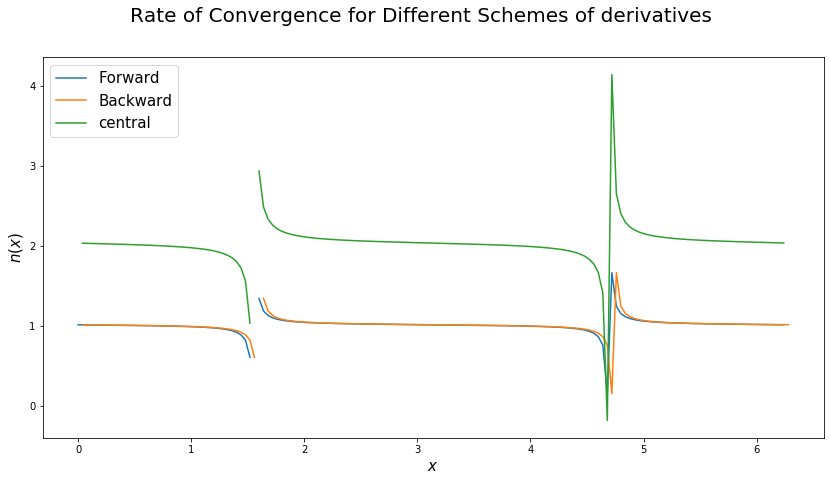

In [98]:
#the order of convergence
# h=0.01
plt.figure(figsize=(14,7))
x_min=0.0
x_max=2.0*pi
x1=arange(x_min,x_max,0.01)
x2=arange(x_min,x_max,0.02)
x3=arange(x_min,x_max,0.04)

#computing the radius of Convergence for Forward Difference method

df1=ff(x1,0.01)
df2=ff(x2,0.02)
df3=ff(x3,0.04)
nf = log2((df3[0:-1] - df2[0:-1:2])/(df2[0:-1:2] - df1[0:-1:4]))
plt.plot(x3[0:-1],nf,label='Forward')

#computing the radius of Convergence for Backward Difference method

df1=fb(x1,0.01)
df2=fb(x2,0.02)
df3=fb(x3,0.04)
nb = log2((df3[1:] - df2[1::2])/(df2[1::2] - df1[1::4]))
plt.plot(x3[1:],nb,label='Backward')

#computing the radius of Convergence for Central Difference method

df1=fc(x1,0.01)
df2=fc(x2,0.02)
df3=fc(x3,0.04)
nc = log2((df3[2:] - df2[2:-2:2])/(df2[2:-2:2] - df1[3:-3:4]))
plt.plot(x3[1:-1],nc,label='central')

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$n(x)$',fontsize=15)
plt.suptitle('Rate of Convergence for Different Schemes of derivatives',fontsize=20)
plt.legend(loc='upper left',fontsize=15)


From the above, the order of convergence of central differencing method is 2 while that of both forward and backward differencing methods is 1. 